In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from scipy.stats import bernoulli

**Tópicos**:
         
 - Distribuições de Probabilidade
     - Distribuições Contínuas
         - Distribuição Normal
         - Distribuição Normal Padrão
 - Inferência Estatística (Parte I)
     - Amostragem
     - O que é Inferência Estatística
     - Lei dos Grandes Números
     - Teorema do Limite Central
     - Intervalo de Confiança
     - Teste de Hipótese
         - O que é um Teste de Hipótese
         - Um exemplo simples
         - Metodologia Genérica do Teste de Hipótese
         - P valor
         - Exemplo Prático

## Distribuições Contínuas

### Distribuição Normal

![](https://i.pinimg.com/originals/34/9b/f6/349bf66317f5a051c89a7b26264c9062.jpg)

A Distribuição Normal é uma distribuiçao contínua e é uma das mais conhecidas na estatística e na ciência de dados. Isso, pois muitos fenômenos podem ser modelados por meio de uma distribuição normal.

Exemplo: Altura de uma população, Idade de uma população, retorno financeiro de ações e etc.

Matematicamente, uma distribuição é normal se segue a seguinte função de densidade de probabilidade.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/362834b765239b64cf7719a3a3a04e172c883e3d)

O que é densidade de probabilidade? Por qual motivo não utilizamos um valor de probabilidade?

Pra definir essa função, precisamos de uma média, representada pela letra grega mi e um desvio padrão, representado pela letra grega sigma.

Diferentemente da Função de Massa de Probabilidade, essa Função não retorna a probabilidade, mas um valor correspondente ao que se conhece por densidade. Para calcular a probabilidade temos que encontrar a área dentro do intervalo especificado.

![](https://statistics.laerd.com/statistical-guides/img/normal-7.png)

Características interessantes:
- A curva é simétrica em relação a média
- A média, a moda e a mediana são iguais

Lembram do BoxPLot?

![](https://jingwen-z.github.io/images/20190319-boxplot-vs-pdf.png)

o IQR nos ajudava a localizar outliers na distribuição.

A distribuição normal é amplamente usada, mas já pararam pra pensar o trampo que daria para calcular as áreas? Isso envolve o cálculo de integrais, que é algo do cálculo II.

Será que existe um jeito mais fácil? Sim! Vamos ver como a curva normal padrão pode nos ajudar!

### Distribuição Normal Padrão

Os pesquisadores calcularam valores de probabilidade para uma curva específica normal. Essa curva possui média igual a 0 e desvio padrão igual a 1.

Tá, mas dificilmente nossas distribuições vão ter exatamente média 0 e desvio padrão 1, certo? Certo!

O pulo do gato é que qualquer distribuição normal poderá passar pelo processo de padronização, que ajustará os valores de tal forma que média seja igual a 0 e o desvio padrão seja igual a 1.

Para isso utilizamos a transformação abaixo:

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRKw5o96x3h5uI4_-LC9l-MANxreLjcFB_QdQ&usqp=CAU)

Vamos criar uma distribuição normal e padronizá-la!

In [2]:
normal_dist = np.random.normal(50, 5, 3000)

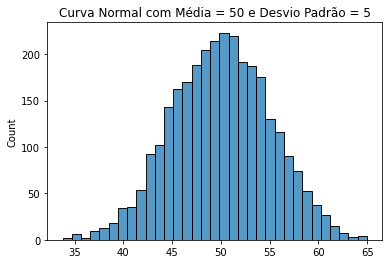

In [11]:
sns.histplot(normal_dist)
plt.title('Curva Normal com Média = 50 e Desvio Padrão = 5')
plt.show()

In [4]:
# media 
media_normal = normal_dist.mean()
# desvio 
desvio_normal = normal_dist.std()
# padronização
z_normal_dist = (normal_dist - media_normal)/desvio_normal

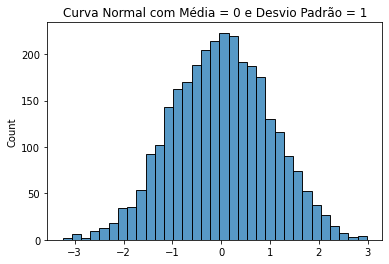

In [12]:
sns.histplot(z_normal_dist)
plt.title('Curva Normal com Média = 0 e Desvio Padrão = 1')
plt.show()



Se quisermos saber, por exemplo, qual a probabilidade de observarmos valores menores que 45, transformamos 45 para Z score e usamos a função ```stats.norm.cdf``` para obter a probabilidade.

Antes disso, vamos ver como o python vai nos retornar as probabilidades

![](https://i.stack.imgur.com/fGYNp.png)

Acima temos uma curva normal padrão e temos um valor de x igual a 1.645, que é o Z score. Se quisermos descobrir a probabilidade de encontrarmos um valor < 1.645, usamos a função stats.norm.cdf, passando como argumento o valor do Z score.

In [14]:
stats.norm.cdf(1.645)

0.9500150944608786

Note que a probabilidade de encontrarmos um valor abaixo de 1.645 na curva normal padrão é de 95%

Se quisermos saber o inverso

In [15]:
stats.norm.ppf(0.95)

1.6448536269514722

Sendo assim, vamos calcular o Z score de 45 e usar nossa função ```stats.norm.cdf```

In [16]:
z_45= (45-media_normal) / desvio_normal

In [17]:
stats.norm.cdf(z_45)

0.1577700726901457

# Inferência Estatística Parte I

## Amostragem

![](https://sites.google.com/site/estatisticabasicacc/_/rsrc/1472780771430/conteudo/parte-2---inferencia/01---amostragem/Screenshot%20from%202015-10-13%2015%3A30%3A17.png)

A Amostragem está mais presente no dia a dia do que você imagina! Duvida?

Estamos realizando amostragem quando:
- Experimentamos um pouco de comida para descobrir se está salgado demais
- Bebemos um pequeno gole de café para descobrir se está muito quente

Mas por qual motivo realizar uma amostragem é tão importante?

A beleza de se utilizar uma amostra é poder inferir características da população que a originou! Mas por qual motivo nós simplesmente não utilizamos a população?

Alguns motivos para que desejemos extrair amostras:
- A coleta pode ser destrutiva
- Coleta impossível
- Coleta muito cara

Como fazer ?

Existem alguns tipos de amostragem. Duas delas são bastante utilizadas:
- Aleatória


<img src=https://cdn2.vectorstock.com/i/1000x1000/65/31/simple-random-sampling-method-in-statistics-vector-28746531.jpg height=400 width=400>

Na amostragem aleatória, não olhamos pra qualquer característica dos dados. Tomamos uma decisão, de fato, completamente aleatória ao escolher os elementos da amostra.

* Estratificada

<img src=https://thumbs.dreamstime.com/z/método-de-amostragem-estratificado-nas-estat%C3%ADsticas-investigação-sobre-recolha-dados-por-em-técnicas-pesquisa-cient%C3%ADfica-168640347.jpg height=400 width=400>

Quando alguma característica da população é muito importante, queremos garantir sua representatividade na amostra. Para isso, utilizamos uma amostragem estratificada, que é aleatória dentro da característica de interesse.

No processo de amostragem, o que interessa é garantir representatividade!!!

## Lei dos Grandes Números

<img src="https://justflipacoin.com/img/share-a-coin.png" width=300 height=300>

Baseando-se na imagem abaixo, que lado da moeda vocês escolhem? Cara ou Coroa??? Por qual motivo??

<img src=https://miro.medium.com/max/1400/0*9HhaHUzYJuHZ6I3b width=500 height=500>

A lei dos grandes números fala que quanto mais experimentos fizermos, mais próximos da média real/teórica (valor esperado) chegaremos!

Note que quanto mais lançamentos fazemos, mais próximo de 0.5 se aproxima a média de ocorrências de Caras.

## Teorema do Limite Central

Vamos definir uma distribuição qualquer

Agora, imagine que iremos coletar diversas amostras de tamanhos diferentes, n vezes. Ou seja, vamos repetir o experimento de amostragem n vezes.

De cada n amostras de tamanhos distintos, vamos extrair a média e observar sua distribuição.

![](https://cdn1.byjus.com/wp-content/uploads/2019/08/central-limit-theorem-formula.jpeg)

A média da distribuição amostral é igual a média populacional e o desvio padrão amostral é igual ao desvio padrão populacional dividido pela raiz do número de elementos na amostra.

## Intervalo de Confiança

A estatística que estamos estudando é baseada em experimentos e amostras. As estimativas que criamos a partir de uma única amostra são pontuais.

Mas e se tivéssemos a oportunidade de repetir a coleta dessa amostra várias e várias vezes? Será que obteríamos os mesmos resultados? 



<i>Provavelmente não. </i>


Nesse contexto, o Intervalo de Confiança surge como uma forma de se obter uma faixa de valores, dentro da qual a característica de interesse se encontra, com um dado <i>nível de confiança</i>.

![](https://i.stack.imgur.com/VUXj4.png)

O que significa o <i>Nível de confiança?</i>

O que significa dizer que A média está contida no intervalo [10, 20] com 95% de confiança

Significa que há uma probabilidade de 95% da média estar entre 10 e 20!

![](https://qi33nyo9wf-flywheel.netdna-ssl.com/blog-images/grraphh.png)

**Exemplo prático**

Em uma companhia aérea temos um vôo com 368 assentos, com um número de passagens vendidas de n=400. Sendo que a probabilidade de no-show é de 10%, e o custo de um passageiro excedente é de 1.000,00 Reais, com $ 0.95 $ de confiança, qual é a exposição financeira total da empresa aérea?

## Testes de Hipóteses

### O que é um Teste de Hipótese

Como falado anteriormente, muitas vezes é impossível obter a população inteira. Dessa forma, precisamos trabalhar com uma amostra, uma parte pertencente ao todo!

Às vezes queremos/precisamos comparar populações ou temos alguma hipótese sobre os parâmetros de uma população e tudo que temos são amostras.
Pois bem, o teste de hipótese nos fornece uma metodologia para que, a partir das evidências trazidas pela amostra, possamos concluir algo sobre a população.

### Um exemplo simples

Uma certa reportagem de TV falou que o salário médio de um Cientista de Dados é 20 mil Reais. 

Será que é verdade?

Você decide procurar no Glassdoor qual que é a média salarial para esse cargo. Dessa forma, você possui agora uma média amostral que aponta que o salário médio é 15 mil. E agora? Qual o real salário? Será que o valor obtido, 15 mil reais, não foi fruto do processo de amostragem?

### Erro tipo I  & Erro do Tipo II

Mesmo realizando um teste de hipótese, podemos chegar à conclusões erradas. Para o nosso exemplo, vamos estabelecer 2 hipóteses: 


**Hipótese 0** (também chamada de hipótese nula), é a afirmação que fazemos a respeito do parâmetro populacional.
No nosso caso, nossa hipótese é que o salário é 20 mil Reais.

**Hipótese 1** (também chamada de hipótese alternativa), é a hipótese que iremos adotar, caso a hipótese 0, inicial, não se sustente estatísticamente.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQAxinK5rj3TUMHsLCblMOqULBXe7eGYKKN2g&usqp=CAU)

**Erro Tipo I**: Rejeitar a H0 quando ela é verdadeira

**Erro Tipo II**: Aceitar H0 quando ela é falsa

O nível de significância, **Alfa**, vai ser a probabilidade de cometermos erro do tipo I.

* Alfa = 5%
* Alfa = 1%

<img src="https://educationalresearchtechniques.files.wordpress.com/2016/02/1.png?w=624">

A área que corresponde à probabilidade de 5% é conhecida como região crítica

Para o erro tipo II, o que influencia é o tamanho da amostra e o tamanho do efeito a ser observado.

Quanto maior o tamanho da amostra, menor a variância, como vimos de acordo com o TLC. Menos achatada é a curva e menos sobreposição. Da mesma forma, quanto maior for o tamanho do efeito que se queira observar, menor a probabilidade de erro tipo II.

![](https://www.ijam-web.org/articles/2017/3/2/images/IntJAcadMed_2017_3_2_268_222485_f1.jpg)

Se continuamos com o mesmo tamanho de amostra e diminuímos a probabilidade de erro tipo I, automaticamente aumentamos a probabilidade de erro tipo II.

![](https://upload.wikimedia.org/wikipedia/commons/0/0d/Teste-de-hipóteses.gif)

### P- valor



Quem é o p-valor na fila do pão?

Bom, dado que definimos nossas hipóteses  e nossa probabilidade de erro do tipo I chegou a hora de realmente testar a hipótese.

O cálculo gira em torno de descobrir qual é a **probabilidade de observamos uma estatística ou efeito tão grande quanto o que estamos observando na nossa amostra, dada que a hipótese nula é verdadeira.**

* Se p-value <= nível de significância, rejeitamos a hipótese nula e aceitamos a hipótese alternativa
* se p-value  nível de significância, não temos evidência suficiente para rejeitar a hipótese nula.

### Metodologia Genérica do Teste de Hipótese

* Passo 1: Fixar as hipóteses Nula e Alternativa

No primeiro passo, temos que definir se iremos realizar um tese unilateral ou bilateral.

unilateral será quando quisermos testar se a estatística da amostra é maior ou menor que o parâmetro da população, isoladamente.

bilateral será quando quisermos testar que a estatística da amostra é diferente, sendo as condições de maior ou menor testadas simultaneamente.

![](https://oestatistico.com.br/wp-content/uploads/2016/01/poder-teste-oestatistico.jpg)

* Passo 2: Fixar o nível de significância, alfa

* Passo 3: Calcular a estatística de interesse a partir de uma amostra.

* Passo 4: Calcular o p-valor para essa estatística e decidir qual hipótese se mantém.

## Exemplos Práticos

### Teste para a Média

Uma máquina que enche pacotes de café com variância de 400g2 estava regulada para encher pacotes com 500g. Você decide coletar uma amostra de 16 pacotes e checar se a máquiina ainda está regulada. A amostra de 16 pacotes possui média de 492g. Baseando-se nisso, você para a produção de café para regular a máquina?

Vamos definir nossas hipóteses

**H0**: u = 500g<br>
**H1**: u != 500g

Do teorema do limite central, temos que:

![](https://cdn1.byjus.com/wp-content/uploads/2019/08/central-limit-theorem-formula.jpeg)

Como temos n = 16:

Então, nossa distribuição amostral da média tem média 500 e desvio padrão 5.

Vamos fixar nosso nível de significância em 0.01. Note que é um teste bilateral.

Agora precisamos calcular a probabilidade (p valor) de encontrarmos um valor de média > 492 ou <492 , numa distribuição de média 500 e desvio padrão 5. Esse será nosso p-valor.

Primeiro, iremos calcular a probabilidade de ser < 492.

Vamos transformar nosso 492 em Z Score e calcular a probabilidade usando o scipy.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ4eNsKX20I2nZpf5QnJFDanHBKferFhH86-Q&usqp=CAU)

Como o teste é bilateral, teremos que dividir a área de 1% (nível de significância em 2). Para cada lado, precisaremos encontrar o Z score equivalente.

Para calcular Z a esquerda, precisaremos descobrir que valor de Z nos traz 0.005% dos dados a esquerda.

Como  são sempre simétricos, Z à direita será igual a Z_esquerdo, porém positivo.

Note que a região crítica do teste é aquela em que <= -2.57 e >= 2.57

Nosso Z_492, porém, vale -1.6. Ou seja, é maior que -2.57 e menor que 2.57. Sendo assim, não cai dentro da região crítica.

Ou seja, cai dentro da região de aceitação do teste, indicando que devemos aceitar a hipótese nula, nesse caso e afirmar que

Vamos calcular o p valor?

Note que 0.054 é maior que 0.005, que é a área da região crítica à esquerda.

Dessa forma, quando p-valor > nível de significância, não rejeitamos a hipótese nula.